In [1]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames

In [2]:
delta = CSV.read("delta.csv")
sw = CSV.read("southwest.csv")
united = CSV.read("united.csv")
american = CSV.read("american.csv")
spirit = CSV.read("spirit.csv")
jb = CSV.read("jetblue.csv")
skywest = CSV.read("skywest.csv")
hh = CSV.read("hawaiian.csv")
mag =CSV.read("mesa.csv")
alaska = CSV.read("alaska.csv");

In [3]:
function abs_err(y,pred)   # absolute error
    return mean(abs.(y-pred))
end

abs_err (generic function with 1 method)

In [5]:
num_of_model = 3
split = [43, 43+44, 43+44*2, 43+44*3, 43+44*4, 43+44*5]  # index for 5-fold

function select_best_model2(stock)  # using k-fold cross validation
    err = zeros(num_of_model,5)
    w = zeros(21)
    avg_trainw1 = []
    avg_testw1 = []
    avg_trainw2 = []
    avg_testw2 = []
    avg_trainw3 = []
    avg_testw3 = []
    
    ftw1 = zeros(6)
    ftw2 = zeros(7)
    ftw3 = zeros(8)
    
    for i in 1:5
        w_set = []
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))
        
        stock_train = stock[7][1:split2]
        stock_val = stock[7][split2 + 1:split_cur]
        
        sent_train = stock[1][1:split2]
        sent_val = stock[1][split2 + 1:split_cur]
        
        trav_train = stock[6][1:split2] #travelling
        trav_val = stock[6][split2 + 1:split_cur]
        
        death_train = stock[3][1:split2]
        death_val = stock[3][split2 + 1:split_cur]
        
        vac_train = stock[2][1:split2]
        vac_val = stock[2][split2 + 1:split_cur]
        
        shut_train = stock[4][1:split2]
        shut_val = stock[4][split2 + 1:split_cur]
    
        # Naive Model, w[1:6]
        Xtrain = [sent_train trav_train death_train vac_train shut_train ones(length(sent_train))]
        Xval = [sent_val trav_val death_val vac_val shut_val ones(length(sent_val))]
        Ytrain = stock_train
        Yval = stock_val
    
        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        err[1,i] = abs_err(Yval,pred)
        append!(avg_trainw1, w_cur)
        
        # AR1 Model, w[7:13] 1 to end - 1
        Xtrain = [sent_train[2:end] stock_train[1:end-1] trav_train[2:end] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stock_val[1:end-1] trav_val[2:end] death_val[2:end] vac_val[2:end] shut_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]
    
        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        err[2,i] = abs_err(Yval,pred)
        append!(avg_trainw2, w_cur)
        
        # AR2 Model, w[14:21]
        Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] trav_train[3:end] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
        Xval = [sent_val[3:end] stock_val[2:end-1] stock_val[1:end-2] trav_val[3:end] death_val[3:end] vac_val[3:end] shut_val[3:end] ones(length(sent_val)-2)]
        Ytrain = stock_train[3:end]
        Yval = stock_val[3:end]
    
        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        err[3,i] = abs_err(Yval,pred)
        w = hcat(w,w_set)
        append!(avg_trainw3, w_cur)
    end
    
    avg_err = mean(err, dims=2)   # avg_abs_err  
    println("validation error ", min(avg_err[2][1]))
    final_model = findmin(avg_err)[2][1]   # select model with min abs error
    #println("Low train error")
    
    if final_model == 1
        for i in 0:4
            ftw1[1] = ftw1[1] + avg_trainw1[1+i*6]
            ftw1[2] = ftw1[2] + avg_trainw1[2+i*6]
            ftw1[3] = ftw1[3] + avg_trainw1[3+i*6]
            ftw1[4] = ftw1[4] + avg_trainw1[4+i*6]
            ftw1[5] = ftw1[5] + avg_trainw1[5+i*6]
            ftw1[6] = ftw1[6] + avg_trainw1[6+i*6]
        end
        ftw1 = ftw1 ./ 5
        println("w train ", ftw1)
    elseif final_model == 2 
        for i in 0:4
            ftw2[1] = ftw2[1] + avg_trainw2[1+i*7]
            ftw2[2] = ftw2[2] + avg_trainw2[2+i*7]
            ftw2[3] = ftw2[3] + avg_trainw2[3+i*7]
            ftw2[4] = ftw2[4] + avg_trainw2[4+i*7]
            ftw2[5] = ftw2[5] + avg_trainw2[5+i*7]
            ftw2[6] = ftw2[6] + avg_trainw2[6+i*7]
            ftw2[7] = ftw2[7] + avg_trainw2[7+i*7]
        end
        ftw2 = ftw2 ./ 5
        println("w train ", ftw2)
    elseif final_model == 3
        for i in 0:4
            ftw3[1] = ftw3[1] + avg_trainw3[1+i*8]
            ftw3[2] = ftw3[2] + avg_trainw3[2+i*8]
            ftw3[3] = ftw3[3] + avg_trainw3[3+i*8]
            ftw3[4] = ftw3[4] + avg_trainw3[4+i*8]
            ftw3[5] = ftw3[5] + avg_trainw3[5+i*8]
            ftw3[6] = ftw3[6] + avg_trainw3[6+i*8]
            ftw3[7] = ftw3[7] + avg_trainw3[7+i*8]
            ftw3[8] = ftw3[8] + avg_trainw3[8+i*8]
        end
        ftw3 = ftw3 ./ 5
        println("w train ", ftw3)
    else
        print("ERROR")
    end
    
    test_err = zeros(5)
    model = ["Naive Model", "AR1 Model", "AR2 Model"]
    
    
    for i in 1:5
        stock_test = stock[7][split[i]+1:split[i+1]]
        sent_test = stock[1][split[i]+1:split[i+1]]
        trav_test = stock[6][split[i]+1:split[i+1]]
        death_test = stock[3][split[i]+1:split[i+1]]
        vac_test = stock[2][split[i]+1:split[i+1]]
        shut_test = stock[4][split[i]+1:split[i+1]]
    
        if final_model == 1   # Naive Model
            Xtest = [sent_test trav_test death_test vac_test shut_test ones(length(sent_test))]
            Ytest = stock_test
    
            w_cur = w[1:6, i+1]
            pred = Xtest*w_cur
            test_err[i] = abs_err(Ytest,pred)
            append!(avg_testw1,w_cur)
        
        elseif final_model == 2   # AR1 Model
            Xtest = [sent_test[2:end] stock_test[1:end-1] trav_test[2:end] death_test[2:end] vac_test[2:end] shut_test[2:end] ones(length(stock_test)-1)]
            Ytest = stock_test[2:end]
        
            w_cur = w[7:13, i+1]
            pred = Xtest*w_cur
            test_err[i] = abs_err(Ytest,pred)
            append!(avg_testw2,w_cur)
        
        elseif final_model == 3   # AR2 Model
            Xtest = [sent_test[3:end] stock_test[2:end-1] stock_test[1:end-2] trav_test[3:end] death_test[3:end] vac_test[3:end] shut_test[3:end] ones(length(stock_test)-2)]
            Ytest = stock_test[3:end]
        
            w_cur = w[14:21, i+1]
            pred = Xtest*w_cur
            test_err[i] = abs_err(Ytest,pred)
            append!(avg_testw3,w_cur)
        
        else
            print("error")
        end
    end

    string("selected model: ", model[final_model], ", estimated error is: ", mean(test_err))
end

select_best_model2 (generic function with 1 method)

In [6]:
select_best_model2(delta)

validation error 1.3812259690871374
w train [-6.105542532364019, 0.9237866349856126, -1.5423027089366885, -0.027112438591223816, -0.08578722368094403, -0.10300033548425191, 6.979497009056852]


"selected model: AR1 Model, estimated error is: 1.0604994735876612"

In [7]:
d_h = -6.105542532364019 -0.10300033548425191 -0.08578722368094403-0.027112438591223816;

In [8]:
select_best_model2(sw)

validation error 1.190925540534613
w train [-6.405902581509563, 0.9173628116946226, -1.1007095857559697, -0.03911513205082992, -0.046643196733428934, -0.0527997512384943, 6.155711320368299]


"selected model: AR1 Model, estimated error is: 1.060983948540808"

In [9]:
sw_h = -6.405902581509563 -0.0527997512384943-0.046643196733428934-0.03911513205082992

-6.544460661532316

In [10]:
select_best_model2(united)

validation error 2.2116142871759115
w train [-9.074603191393384, 0.9246518737317866, -4.015116878772571, -0.066514488899965, -0.004813877008659755, -0.12466633951873325, 13.849382852722991]


"selected model: AR1 Model, estimated error is: 1.975769148033382"

In [11]:
united_h = -9.074603191393384-0.12466633951873325-0.004813877008659755-0.066514488899965

-9.270597896820743

In [12]:
select_best_model2(american)

validation error 0.7308966277938301
w train [-4.381019812693288, 0.9772854748724022, 0.31652043901686894, -0.004102151909225466, 0.001278931942351943, 0.029568251402884126, -1.173997742718789]


"selected model: AR1 Model, estimated error is: 0.5562651742726856"

In [13]:
american_h = -4.381019812693288 + 0.001278931942351943+ 0.029568251402884126-0.004102151909225466

-4.354274781257277

In [14]:
select_best_model2(spirit)

validation error 1.2055499680394983
w train [-5.996400957497773, 0.9664073623883015, -0.531064156409666, -0.0003199890137471365, -0.054755203814180343, -0.024787821523145143, 1.3064600674197646]


"selected model: AR1 Model, estimated error is: 1.2331259010593105"

In [15]:
spirit_h = -5.996400957497773-0.024787821523145143-0.054755203814180343-0.0003199890137471365

-6.076263971848847

In [16]:
select_best_model2(skywest)

validation error 2.0120184894446
w train [-7.01488674813943, 0.9122643682907834, -3.084959422907954, -0.03075630036958658, -0.011296081950280052, -0.12501163315253982, 11.087680211797926]


"selected model: AR1 Model, estimated error is: 1.7371417269753415"

In [17]:
skywest_h = -7.01488674813943-0.12501163315253982 -0.011296081950280052-0.03075630036958658

-7.1819507636118365

In [18]:
select_best_model2(hh)

validation error 0.6953757914183909
w train [-2.8759431952388903, 0.9276036651690995, -1.0408982179619435, -0.01600536922445283, -0.031094796822271325, -0.03835072300254767, 3.8257801723856195]


"selected model: AR1 Model, estimated error is: 0.6948212499354476"

In [19]:
hh_h = -2.8759431952388903-0.03835072300254767 -0.031094796822271325-0.01600536922445283

-2.9613940842881616

In [20]:
select_best_model2(mag)

validation error 0.19431317918243773
w train [-1.0413218953999277, 0.8704897576775281, -0.4512376901305684, -0.008080542509738397, -0.013391225577079979, -0.023442678175247415, 1.8731204188846742]


"selected model: AR1 Model, estimated error is: 0.1866275209032122"

In [21]:
mag_h = -1.0413218953999277-0.023442678175247415-0.013391225577079979-0.008080542509738397

-1.0862363416619936

In [22]:
select_best_model2(alaska)

validation error 1.5648498287705592
w train [-9.685118395628976, 0.9257463290335102, -2.5143473986595013, -0.0453252385650829, -0.052194975020549005, -0.0856641058529979, 9.373812149554956]


"selected model: AR1 Model, estimated error is: 1.5701272707989424"

In [23]:
alaska_h = -9.685118395628976-0.0453252385650829-0.052194975020549005-0.0856641058529979

-9.868302715067607

In [24]:
select_best_model2(jb)

validation error 0.5300824602723775
w train [-2.2968143338938094, 1.2041051086935308, -0.24925660649288428, -0.4541878293116285, -0.01202611255365262, -0.020164972673184435, -0.0009431498241231453, 1.569703709806726]


"selected model: AR2 Model, estimated error is: 0.4956087340578166"

In [25]:
jb_h =-2.2968143338938094-0.0009431498241231453-0.020164972673184435-0.01202611255365262

-2.32994856894477

average COVID headline exposure for airlines -5.599487231515399


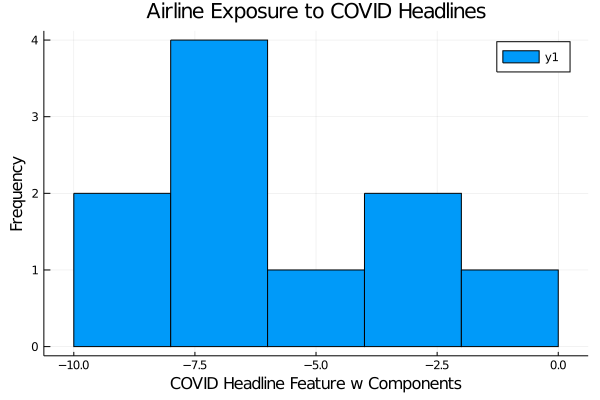

In [26]:
sent_w = [jb_h, alaska_h, d_h, united_h, sw_h, skywest_h, mag_h, hh_h, spirit_h, american_h]
println("average COVID headline exposure for airlines ", mean(sent_w))
histogram(sent_w, nbins = 5)
title!("Airline Exposure to COVID Headlines")
xlabel!("COVID Headline Feature w Components")
ylabel!("Frequency")

In [28]:
function select_best_model3(stock)
    plot([1,2,3],[4,5,6])
    # index for 5-fold
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    num_of_model = 3
    mse = zeros(num_of_model,5)
    w = zeros(21)
    for i in 1:5
        w_set = []
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))

        stock_train = stock[7][1:split2]
        stock_val = stock[7][split2 + 1:split_cur]

        sent_train = stock[1][1:split2]
        sent_val = stock[1][split2 + 1:split_cur]

        trav_train = stock[6][1:split2] #travelling
        trav_val = stock[6][split2 + 1:split_cur]

        death_train = stock[3][1:split2]
        death_val = stock[3][split2 + 1:split_cur]

        vac_train = stock[2][1:split2]
        vac_val = stock[2][split2 + 1:split_cur]

        shut_train = stock[4][1:split2]
        shut_val = stock[4][split2 + 1:split_cur]

        #Naive Model, w[1:6]
        Xtrain = [sent_train trav_train death_train vac_train shut_train ones(length(sent_train))]
        Xval = [sent_val trav_val death_val vac_val shut_val ones(length(sent_val))]
        Ytrain = stock_train
        Yval = stock_val

        w_cur = Xtrain\Ytrain
        #w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[1,i] = abs_err(Yval,pred)

        #AR1 Model, w[7:13]
        Xtrain = [sent_train[2:end] stock_train[1:end-1] trav_train[2:end] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stock_val[1:end-1] trav_val[2:end] death_val[2:end] vac_val[2:end] shut_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]

        w_cur = Xtrain\Ytrain
        #w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[2,i] = abs_err(Yval,pred)

        # AR2 Model, w[14:21]
        Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] trav_train[3:end] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
        Xval = [sent_val[3:end] stock_val[2:end-1] stock_val[1:end-2] trav_val[3:end] death_val[3:end] vac_val[3:end] shut_val[3:end] ones(length(sent_val)-2)]
        Ytrain = stock_train[3:end]
        Yval = stock_val[3:end]

        w_cur = Xtrain\Ytrain
        #w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[3,i] = abs_err(Yval,pred)
        #w = hcat(w,w_set)
    end
    #w = w[:,2:6]
    avg_mse = mean(mse, dims=2)
    
    
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    model = ["model 1", "model 2", "model 3"]
    model_length = [5, 6, 7]
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(model_length[final_model])
    for i in 1:5
    #Fixed index
        stock_train = stock[7][1:split[i]]
        sent_train = stock[1][1:split[i]]
        trav_train = stock[6][1:split[i]]
        death_train = stock[3][1:split[i]]
        vac_train = stock[2][1:split[i]]
        shut_train = stock[4][1:split[i]]

        stock_test = stock[7][split[i]+1:split[i+1]]
        sent_test = stock[1][split[i]+1:split[i+1]]
        trav_test = stock[6][split[i]+1:split[i+1]]
        death_test = stock[3][split[i]+1:split[i+1]]
        vac_test = stock[2][split[i]+1:split[i+1]]
        shut_test = stock[4][split[i]+1:split[i+1]]

        if final_model == 1
            Xtrain = [sent_train trav_train death_train vac_train shut_train ones(length(sent_train))]
            Xtest = [sent_test trav_train death_test vac_test shut_test ones(length(sent_test))]
            Ytrain = stock_train
            Ytest = stock_test

            w_cur = Xtrain\Ytrain
            #w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [1:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "Naive Model")
            end

        elseif final_model == 2
            Xtrain = [sent_train[2:end] stock_train[1:end-1] trav_train[2:end] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(stock_train)-1)]
            Xtest = [sent_test[2:end] stock_test[1:end-1] trav_test[2:end] death_test[2:end] vac_test[2:end] shut_test[2:end] ones(length(stock_test)-1)]
            Ytrain = stock_train[2:end]
            Ytest = stock_test[2:end]

            w_cur = Xtrain\Ytrain
            #w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                #println("DL")
                date = [3:44]
                (plot!(date, Ytest, color = :red,  label = "Actual Stock Price"))
                (plot!(date, pred, color = :blue, label = "AR1 Model"))
                return Ytest,pred
            end

        elseif final_model == 3
            Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] trav_train[3:end] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
            Xtest = [sent_test[3:end] stock_test[2:end-1] stock_test[1:end-2] trav_test[3:end] death_test[3:end] vac_test[3:end] shut_test[3:end] ones(length(stock_test)-2)]
            Ytrain = stock_train[3:end]
            Ytest = stock_test[3:end]

            w_cur = Xtrain\Ytrain
            #w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred) 
            #plot
            if i == 5
                date = [3:44]
                plot!(date, Ytest, color = :red, label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR2 Model")
                return Ytest,pred
            end
        else
            print("error")
        end  
    end
    #w_test = w_test[:,2:6]
    print("Selected: ", model[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
end

select_best_model3 (generic function with 1 method)

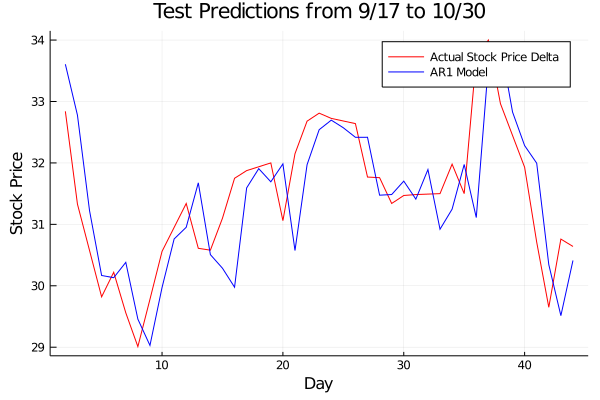

In [30]:
y,p = select_best_model3(delta)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Delta")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

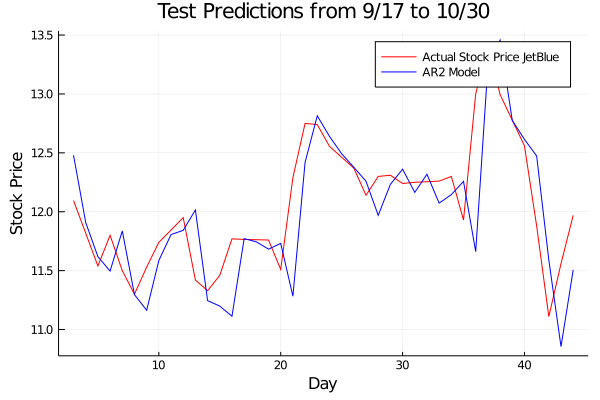

In [31]:
y,p = select_best_model3(jb)
date = collect(3:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price JetBlue")
plot!(date, p, color = :blue, label = "AR2 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

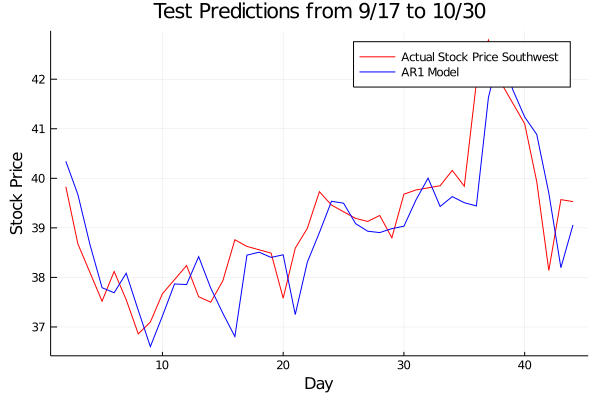

In [33]:
y,p = select_best_model3(sw)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Southwest")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

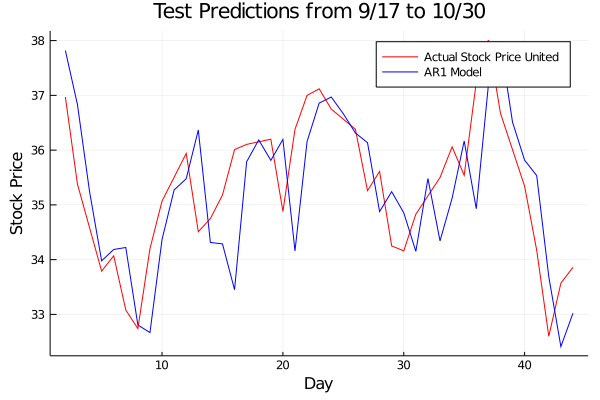

In [34]:
y,p = select_best_model3(united)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price United")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

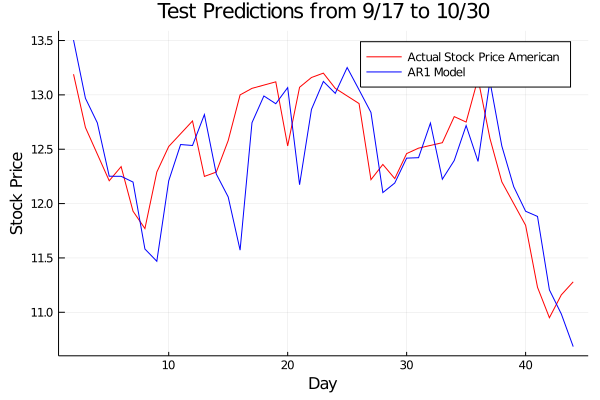

In [35]:
y,p = select_best_model3(american)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price American")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

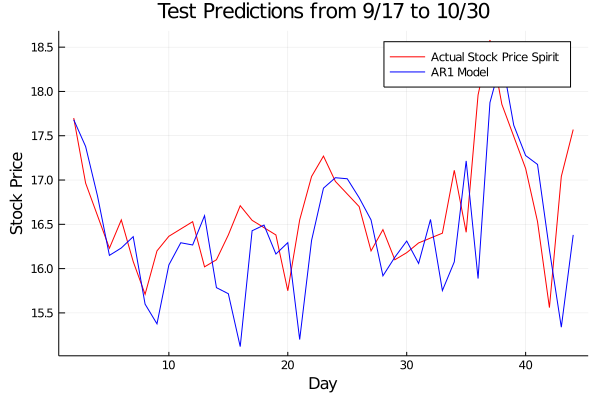

In [36]:
y,p = select_best_model3(spirit)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Spirit")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

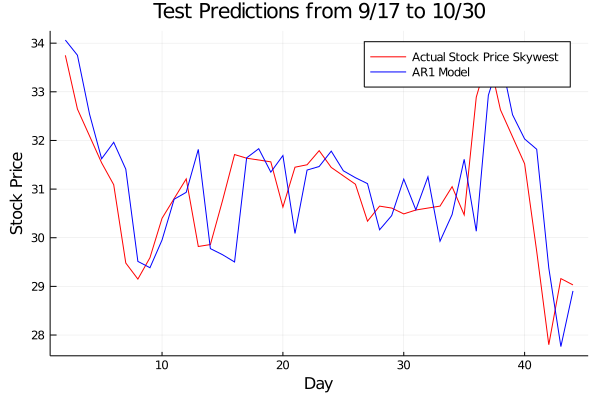

In [37]:
y,p = select_best_model3(skywest)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Skywest")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

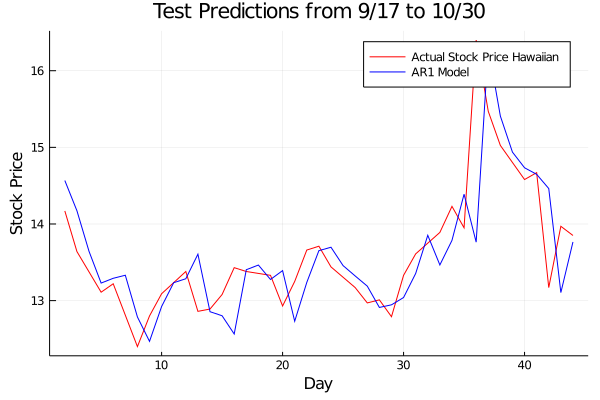

In [38]:
y,p = select_best_model3(hh)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Hawaiian")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

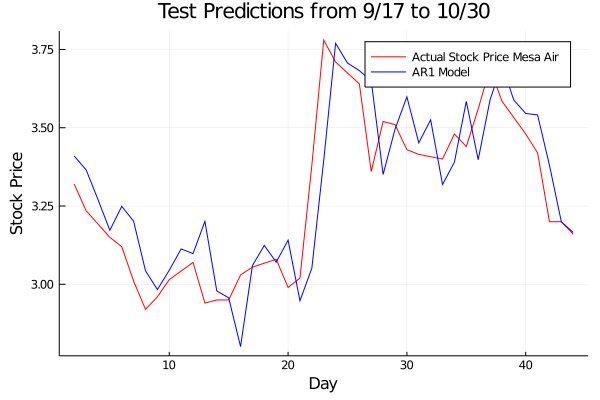

In [39]:
y,p = select_best_model3(mag)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Mesa Air")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")

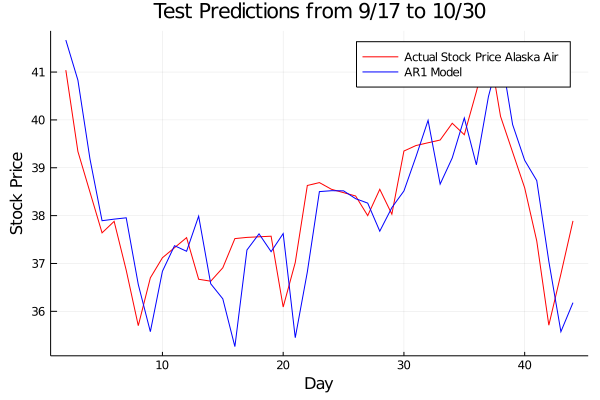

In [40]:
y,p = select_best_model3(alaska)
date = collect(2:1:44)
plot(date, y, color = :red,  label = "Actual Stock Price Alaska Air")
plot!(date, p, color = :blue, label = "AR1 Model")
title!("Test Predictions from 9/17 to 10/30")
xlabel!("Day")
ylabel!("Stock Price")